In [1]:
 import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns


In [2]:
!unzip /content/drive/MyDrive/minor2/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: datset/T/Normal/Normal-1394.png  
  inflating: datset/T/Normal/Normal-1395.png  
  inflating: datset/T/Normal/Normal-1396.png  
  inflating: datset/T/Normal/Normal-1397.png  
  inflating: datset/T/Normal/Normal-1398.png  
  inflating: datset/T/Normal/Normal-1399.png  
  inflating: datset/T/Normal/Normal-1400.png  
  inflating: datset/T/Normal/Normal-1401.png  
  inflating: datset/T/Normal/Normal-1402.png  
  inflating: datset/T/Normal/Normal-1403.png  
  inflating: datset/T/Normal/Normal-1404.png  
  inflating: datset/T/Normal/Normal-1405.png  
  inflating: datset/T/Normal/Normal-1406.png  
  inflating: datset/T/Normal/Normal-1407.png  
  inflating: datset/T/Normal/Normal-1408.png  
  inflating: datset/T/Normal/Normal-1409.png  
  inflating: datset/T/Normal/Normal-1410.png  
  inflating: datset/T/Normal/Normal-1411.png  
  inflating: datset/T/Normal/Normal-1412.png  
  inflating: datset/T/Normal/Normal-1413.png  
  inflati

In [3]:
train_path="datset/T"
val_path="datset/V"

In [4]:
for directory_path in glob.glob("datset/T/*"):
    label = directory_path.split("\\")[-1]
    print(label)

datset/T/Normal
datset/T/pneumonia
datset/T/covid+


In [5]:
import os

list = os.listdir('datset/T/covid+') # dir is your directory path
TP= len(list)
print (TP)

3076


In [6]:
list = os.listdir('datset/T/Normal') # dir is your directory path
TN= len(list)
print (TN)

2964


In [7]:
trainingdata=TP+TN;

In [8]:
list = os.listdir('datset/V/covid+') # dir is your directory path
TestP= len(list)
print (TestP)

540


In [9]:
list = os.listdir('datset/V/Normal') # dir is your directory path
TestN= len(list)
print (TestN)

540


In [10]:
testdata=TestP+TestN;

testing  vs training (80:20)

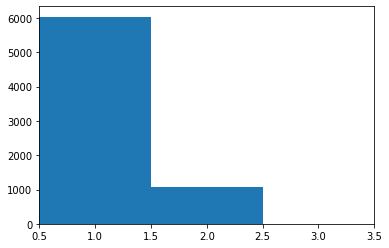

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
s = fig.add_subplot(111)
s.bar([1, 2], [trainingdata,testdata], width=1)
s.set_xlim(0.5, 3.5)
fig.savefig('t.png')

Define Constant

In [12]:
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 2

For training data 

In [13]:
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2  import preprocess_input

In [14]:

IMAGE_SIZE = [224, 224]
resnet_v2 = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


234561536/234545216 [==============================] - 2s 0us/step


In [15]:
resnet_v2.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [16]:
for layer in resnet_v2.layers:
  layer.trainable = False

In [17]:

x = Flatten()(resnet_v2.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=resnet_v2.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [18]:
from keras import optimizers


adam = optimizers.Adam(0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [19]:

# Image Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
   
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [20]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [21]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7253 images belonging to 3 classes.


In [22]:
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1212 images belonging to 3 classes.


In [23]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='inceptionv2.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  validation_steps=2,
  callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
227/227 - 204s - loss: 0.6341 - accuracy: 0.7925 - val_loss: 0.3836 - val_accuracy: 0.8906

Epoch 00001: val_loss improved from inf to 0.38355, saving model to inceptionv2.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
227/227 - 118s - loss: 0.4610 - accuracy: 0.8499 - val_loss: 0.5800 - val_accuracy: 0.8750

Epoch 00002: val_loss did not improve from 0.38355
Epoch 3/10
227/227 - 117s - loss: 0.4240 - accuracy: 0.8681 - val_loss: 0.2693 - val_accuracy: 0.9219

Epoch 00003: val_loss improved from 0.38355 to 0.26927, saving model to inceptionv2.h5
Epoch 4/10
227/227 - 117s - loss: 0.3729 - accuracy: 0.8752 - val_loss: 0.3200 - val_accuracy: 0.9375

Epoch 00004: val_loss did not improve from 0.26927
Epoch 5/10
227/227 - 117s - loss: 0.3605 - accuracy: 0.8849 - val_loss: 0.3661 - val_accuracy: 0.9219

Epoch 00005: val_loss did not improve from 0.26927
Epoch 6/10
227/227 - 117s - loss: 0.3372 - accuracy: 0.8931 - val_loss: 0.4555 - val_accuracy: 0.8906

Epoch 00006: val_loss did not improve from 0.26927
Epoch 7/10
227/227 - 116s - loss: 0.3520 - accuracy: 0.8911 - val_loss: 0.5052 - val_accuracy: 0.8438

Epoch 00007: val_loss did not improve from 0.26927
Epoch 8/10
227/227 - 116s - loss: 0.3705

In [27]:
 ResNet152V2_model=model

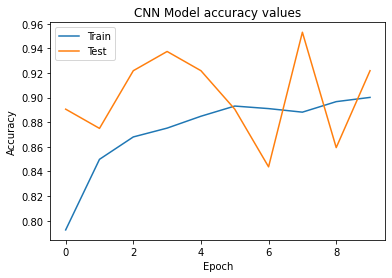

In [24]:

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import classification_report

test_pred_raw = ResNet152V2_model.predict(test_set)
test_labels = np.asarray(test_set.classes)
test_pred = np.argmax(test_pred_raw, axis=1)

class_names = list(test_set.class_indices.keys())
print(classification_report(test_labels, test_pred))
print(test_set.class_indices)

TypeError: ignored

In [30]:
import matplotlib.pyplot as plt
import itertools 

#by https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [32]:
classes=["COVID",  "Normal","pneumonia"]

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix 
Normalized confusion matrix
Confusion matrix, without normalization


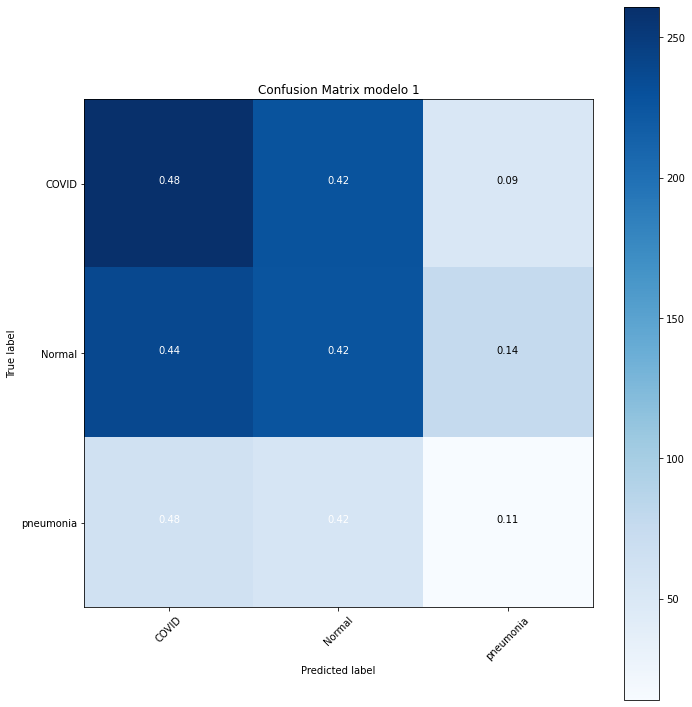

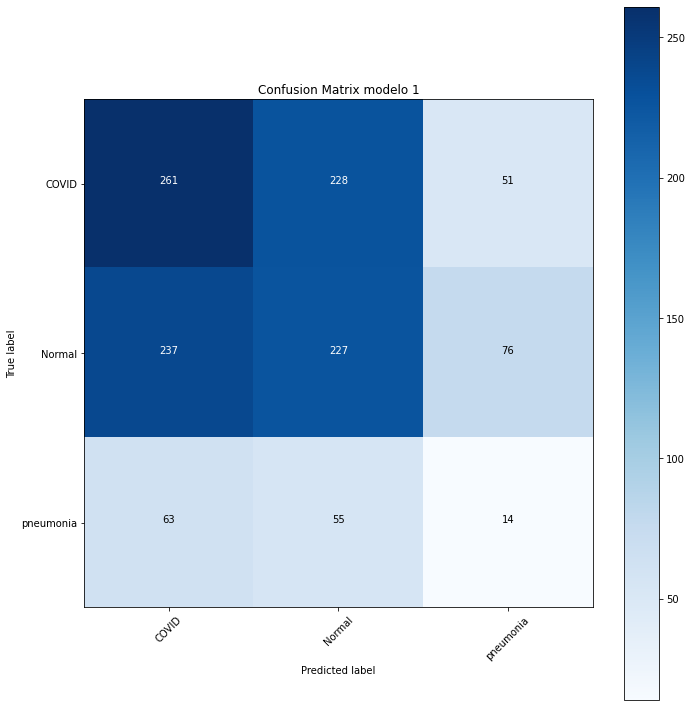

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred =  ResNet152V2_model.predict_generator(test_set)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix ')

cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion Matrix modelo 1')
plot_confusion_matrix(cm, classes,False, title='Confusion Matrix modelo 1')

In [25]:
import pickle

In [ ]:
with open('resnet152vsave','wb') as file:
    pickle.dump(model.history,file)

RecursionError: ignored

In [ ]:

from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(model_history, 'resnet152vsave')

RecursionError: ignored

ValueError: ignored

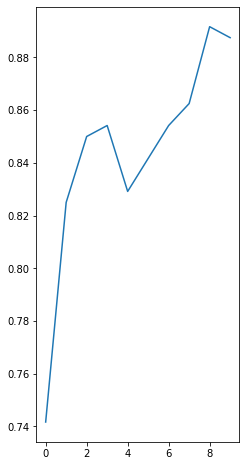

In [ ]:
 #analysis
acc = model_history.history['accuracy']

val_acc = model_history.history['val_accuracy']
val_acc2=np.array(val_acc)
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
EPOCHS = 10
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
acc = model_history.history['accuracy']

In [ ]:
print(acc)

[0.7416666746139526, 0.824999988079071, 0.8500000238418579, 0.8541666865348816, 0.8291666507720947, 0.8416666388511658, 0.8541666865348816, 0.862500011920929, 0.8916666507720947, 0.887499988079071]
